In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind
from itertools import combinations
from collections import Counter
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [38]:
Films = pd.read_csv(r'E:\Classes\Python\New folder\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Films.csv')
Loan = pd.read_csv(r'E:\Classes\Python\New folder\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\LoansData.csv')
Price = pd.read_csv(r'E:\Classes\Python\New folder\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Price_Quotes.csv')
Priority = pd.read_csv(r'E:\Classes\Python\New folder\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Priority_Assessment.csv')
Treatment =pd.read_csv(r'E:\Classes\Python\New folder\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Treatment_Facility.csv')

In [39]:
print("Films***",Films.head())
print("Loan***",Loan.head())
print("Price***",Price.head())
print("Priority***",Priority.head())
print("Treatment***",Treatment.head())

Films***    _rowstate_                    Movie  Gender Marital_Status  Sinage  \
0           0  Ferris Buellers Day Off  Female        Married     2.0   
1           0  Ferris Buellers Day Off  Female         Single     1.0   
2           0  Ferris Buellers Day Off    Male        Married     2.0   
3           0  Ferris Buellers Day Off  Female        Married     1.0   
4           0  Ferris Buellers Day Off  Female        Married     1.0   

   Parking  Clean  Overall  Age  Income Hear_About  
0      2.0    2.0      2.0  3.0     1.0          5  
1      1.0    1.0      1.0  2.0     1.0          5  
2      4.0    3.0      2.0  4.0     1.0          5  
3      3.0    2.0      2.0  4.0     1.0          5  
4      1.0    1.0      1.0  3.0     3.0          1  
Loan***    Amount.Requested  Amount.Funded.By.Investors Interest.Rate Loan.Length  \
0           20000.0                     20000.0         8.90%   36 months   
1           19200.0                     19200.0        12.12%   36 month

## BUSINESS PROBLEM-1

In [44]:
##A
Loan['Interest.Rate'] = pd.to_numeric(Loan['Interest.Rate'].replace('%', ''))
Loan.dropna(subset=['Amount.Requested', 'Interest.Rate'], inplace=True)
correlation, p_value = pearsonr(Loan['Amount.Requested'], Loan['Interest.Rate'])
print(f"Pearson Correlation: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.33245376620082473
P-value: 1.5803794085812453e-65


In [42]:
##B
Loan['Interest.Rate'] = pd.to_numeric(Loan['Interest.Rate'].str.replace('%', ''))
Loan['Loan.Length'] = Loan['Loan.Length'].str.extract('(\d+)').astype(float)
X = sm.add_constant(Loan['Loan.Length'])
y = Loan['Interest.Rate']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Interest.Rate   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 16 Aug 2023   Prob (F-statistic):                nan
Time:                        19:17:15   Log-Likelihood:                    nan
No. Observations:                2500   AIC:                               nan
Df Residuals:                    2498   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const              nan        nan        nan      

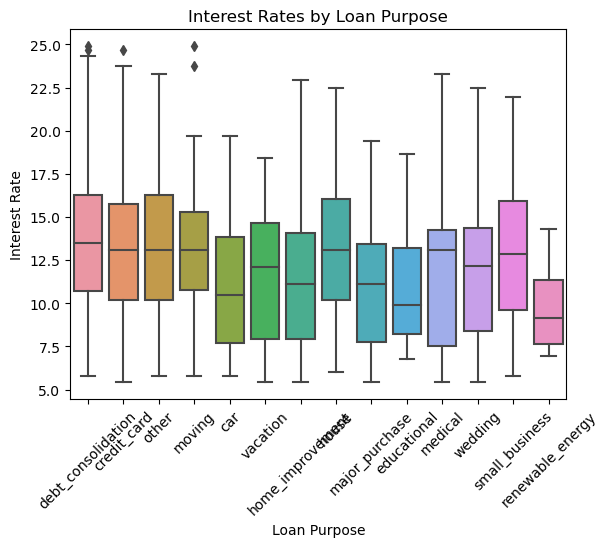

                            sum_sq      df         F        PR(>F)
C(Q("Loan.Purpose"))   1641.664364    13.0  7.481404  1.168630e-14
Residual              41928.515109  2484.0       NaN           NaN


In [49]:
##C
Loan['Interest.Rate'] = pd.to_numeric(Loan['Interest.Rate'].replace('%', ''))
Loan.dropna(subset=['Loan.Purpose', 'Interest.Rate'], inplace=True)
sns.boxplot(x='Loan.Purpose', y='Interest.Rate', data=Loan)
plt.xticks(rotation=45)
plt.xlabel('Loan Purpose')
plt.ylabel('Interest Rate')
plt.title('Interest Rates by Loan Purpose')
plt.show()
model = ols('Q("Interest.Rate") ~ C(Q("Loan.Purpose"))', data=Loan).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

In [53]:
##D
def calculate_fico_mean(range_str):
    if pd.isnull(range_str):
        return np.nan
    range_values = range_str.split('-')
    lower_value = int(range_values[0])
    upper_value = int(range_values[1])
    return (lower_value + upper_value) / 2

Loan['FICO.Score'] = Loan['FICO.Range'].apply(calculate_fico_mean)
Loan.dropna(subset=['FICO.Score', 'Home.Ownership'], inplace=True)
own_fico = Loan[Loan['Home.Ownership'] == 'OWN']['FICO.Score']
rent_fico = Loan[Loan['Home.Ownership'] == 'RENT']['FICO.Score']
t_stat, p_value = stats.ttest_ind(own_fico, rent_fico, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 2.1804286689577492
P-value: 0.030186147662145224


In [59]:
def calculate_fico_mean(range_str):
    if pd.isnull(range_str):
        return None
    range_values = range_str.split('-')
    lower_value = int(range_values[0])
    upper_value = int(range_values[1])
    return (lower_value + upper_value) / 2
Loan['FICO.Score'] = Loan['FICO.Range'].apply(calculate_fico_mean)
Loan.dropna(subset=['FICO.Score', 'Home.Ownership'], inplace=True)
data = Loan[['FICO.Score', 'Home.Ownership']].rename(columns={'FICO.Score': 'FICO', 'Home.Ownership': 'Ownership'})
model = sm.formula.ols('FICO ~ C(Ownership)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq      df          F        PR(>F)
C(Ownership)  9.200940e+04     4.0  19.273004  1.252564e-15
Residual      2.971818e+06  2490.0        NaN           NaN


## BUSINESS PROBLEM - 2

In [61]:
##A
t_stat, p_value = stats.ttest_ind(Price['Barry_Price'], Price['Mary_Price'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the average price quotes.")
else:
    print("There is no significant difference in the average price quotes.")

T-statistic: 1.4147436739281787
P-value: 0.17114226132118285
There is no significant difference in the average price quotes.


## BUSINESS PROBLEM - 3

In [74]:
prior_data = Treatment[Treatment['Reengineer'] == 'Prior']
after_data = Treatment[Treatment['Reengineer'] != 'Prior']
# Perform t-test for critical incidents (VAR4 and VAR5)
critical_incidents_var4 = ttest_ind(prior_data['VAR4'], after_data['VAR4'])
critical_incidents_var5 = ttest_ind(prior_data['VAR5'], after_data['VAR5'])
# Perform t-test for employee turnover
employee_turnover = ttest_ind(prior_data['Employee_Turnover'], after_data['Employee_Turnover'])
alpha = 0.05  # significance level

# Check if p-value is less than alpha for critical incidents
if critical_incidents_var4.pvalue < alpha:
    print("There is evidence of a significant change in critical incidents (VAR4).",critical_incidents_var4)
else:
    print("There is no significant change in critical incidents (VAR4).",critical_incidents_var4)

if critical_incidents_var5.pvalue < alpha:
    print("There is evidence of a significant change in critical incidents (VAR5).",critical_incidents_var5)
else:
    print("There is no significant change in critical incidents (VAR5).",critical_incidents_var5)

# Check if p-value is less than alpha for employee turnover
if employee_turnover.pvalue < alpha:
    print("There is evidence of a significant change in employee turnover.",employee_turnover)
else:
    print("There is no significant change in employee turnover.",employee_turnover)


There is evidence of a significant change in critical incidents (VAR4). Ttest_indResult(statistic=2.783398448880451, pvalue=0.012265082138734354)
There is no significant change in critical incidents (VAR5). Ttest_indResult(statistic=1.627914425352865, pvalue=0.12091989189884148)
There is no significant change in employee turnover. Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)


## BUSINESS PROBLEM-4

In [63]:
anova_result = stats.f_oneway(
    Priority[Priority["Priority"] == "High"]["Days"],
    Priority[Priority["Priority"] == "Medium"]["Days"],
    Priority[Priority["Priority"] == "Low"]["Days"]
)

# Print ANOVA results
print("ANOVA Results:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

ANOVA Results:
F-statistic: 1.812311010076072
p-value: 0.16411459461716182


## BUSINESS PROBLEM-5

In [64]:
## A
average_satisfaction = Films['Overall'].mean()

print(f"The overall level of customer satisfaction is: {average_satisfaction:.2f}")

The overall level of customer satisfaction is: 1.62


In [68]:
##B
correlations = Films.corr(numeric_only=True)['Overall']
sorted_correlations = correlations.sort_values(ascending=False)
factors_linked_to_satisfaction = sorted_correlations[sorted_correlations > 0].index
print("Factors linked to satisfaction:",factors_linked_to_satisfaction)

Factors linked to satisfaction: Index(['Overall', 'Parking', 'Sinage', 'Clean'], dtype='object')


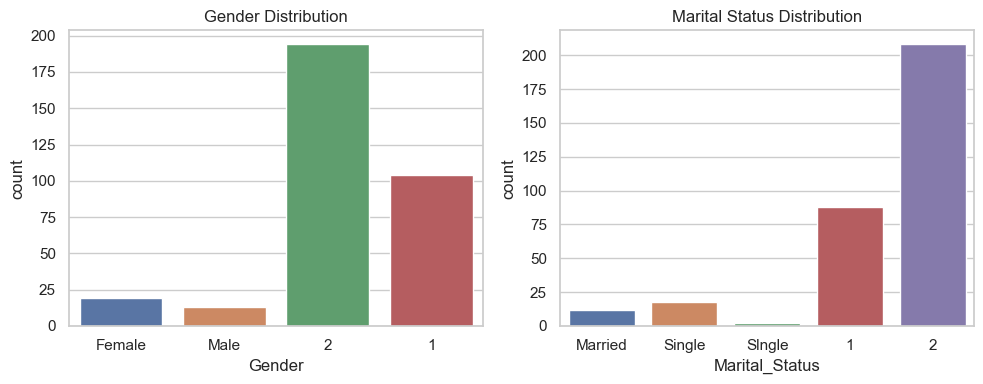

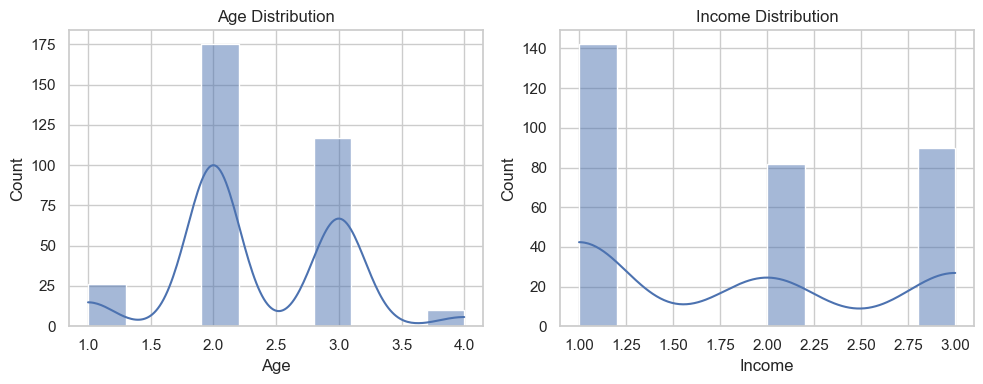

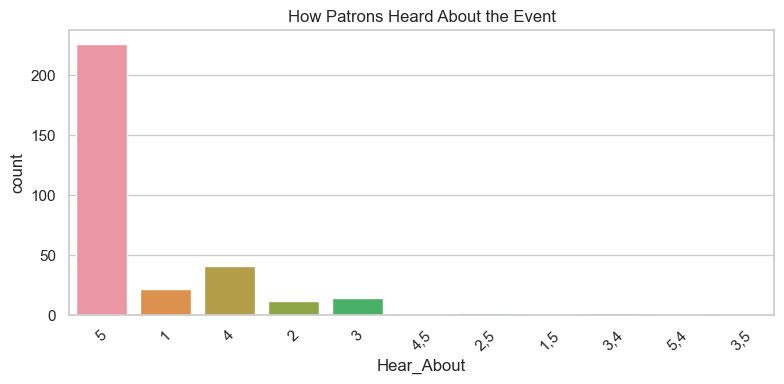

In [69]:
##C
sns.set(style="whitegrid")

# Plot Gender and Marital Status distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=Films, x='Gender')
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=Films, x='Marital_Status')
plt.title('Marital Status Distribution')

plt.tight_layout()
plt.show()

# Plot Age and Income distributions
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=Films, x='Age', bins=10, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data=Films, x='Income', bins=10, kde=True)
plt.title('Income Distribution')

plt.tight_layout()
plt.show()

# Plot Hear About the Event distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=Films, x='Hear_About')
plt.title('How Patrons Heard About the Event')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

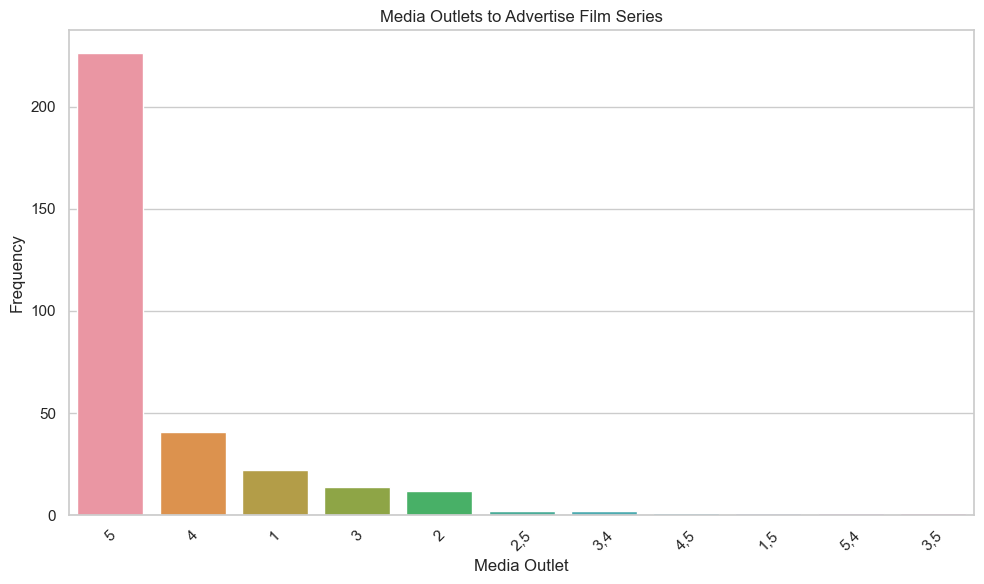

In [70]:
##D
sns.set(style="whitegrid")
media_outlet_counts = Films['Hear_About'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=media_outlet_counts.index, y=media_outlet_counts.values)
plt.title('Media Outlets to Advertise Film Series')
plt.xlabel('Media Outlet')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()